In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# createLeader takes a list of [t,v] coordinates and returns a numpy array of [t,x,v] coordinates
# you don't have to use this. you could just write a list of t,x,v coordinates yourself
def createLeader(le):
    le = np.array(le)
    le = np.array([np.cumsum(le[:,0]),np.cumsum(le[:,0]*le[:,1]), le[:,1]]).T
    le = np.vstack([[0,0,0],le])
    le[0:-1,2] = le[1:,2]
    return le

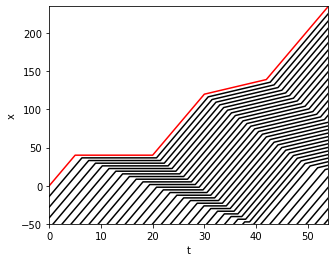

In [3]:
# create the fig and axis
fig,ax = plt.subplots(figsize=(5,4))

#define the constants of the newell car following model. these are arbitrary.
    # notation given as in https://en.wikipedia.org/wiki/Newell%27s_car-following_model
vf,τ,δ = 8,.75,3.5 
#leader is a numpy array of [t,x,v] coordinates
leader = createLeader([ 
    [5,vf],
    [15,0],
    [10,vf],
    [12,vf/5],
    [12,vf],
    [20,0]])

ax.plot(leader[:,0],leader[:,1],color='red') #plot the leader in red

# set the time and space bounds to whatever you want
ax.set_xlim([0,leader[-2,0]])
ax.set_ylim([leader[0,1]-50,leader[-1,1]])
ax.set_xlabel("t"); ax.set_ylabel("x")
# now make all the other cars
N = 45 # the number of follower cars
s = δ*4 # the spacing between the followers
# now calculate and plot the follower trajectories
for i in np.arange(1,N):
    fol = [[0,-i*s,vf]]
    for (t1,x1,v1) in leader:
        t0,x0,v0 = fol[-1]
        if v1 != v0:
            s0 = (x1 - x0) - (t1-t0)*v0 #distance spacing from next vehicle
            t2 = max(t1+(s0- v1*τ-δ )/(v0-v1),t0) #time spacing from next vehiclen
            fol.append([t2, x0+v0*(t2-t0), v1])
    leader = np.array(fol) #set the follower to be new "leader"
    ax.plot(leader[:,0],leader[:,1],c='black') #plot the new "leader" trajectory